# Dropout Regularization

It's a little non-intuitive, but sometimes throwing data away during training produces better results!

That's because we're not throwing it away entirely, but hiding a random portion of the data at each training step. That helps to prevent overfitting, and forces the neural network to spread out its learning over more of its neurons.

Let's see it in action. We'll use scikit_learn's make_classification function to randomly create a clustering problem with 4 classes, and 1000 samples:

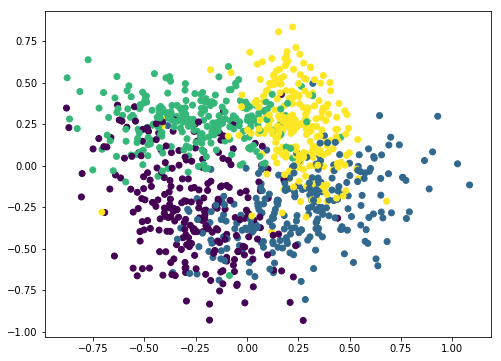

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_classes=4, n_samples=1000, n_redundant=0, n_informative=2,
                           random_state=47, n_clusters_per_class=1, scale=0.25)

from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

As we did before, we'll use the to_categorical function to "one-hot encode" our label data, and then produce a random train/test split of the resulting dataset:

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Now, let's set up a deep neural network without any dropout layers, and see how it does:

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 2s - loss: 1.3821 - acc: 0.2488 - val_loss: 1.3668 - val_acc: 0.2700
Epoch 2/100
 - 0s - loss: 1.3676 - acc: 0.2750 - val_loss: 1.3526 - val_acc: 0.3700
Epoch 3/100
 - 0s - loss: 1.3527 - acc: 0.4087 - val_loss: 1.3389 - val_acc: 0.4700
Epoch 4/100
 - 0s - loss: 1.3392 - acc: 0.4837 - val_loss: 1.3255 - val_acc: 0.5400
Epoch 5/100
 - 0s - l

Epoch 89/100
 - 0s - loss: 0.5943 - acc: 0.7563 - val_loss: 0.6469 - val_acc: 0.7350
Epoch 90/100
 - 0s - loss: 0.5940 - acc: 0.7587 - val_loss: 0.6470 - val_acc: 0.7400
Epoch 91/100
 - 0s - loss: 0.5938 - acc: 0.7587 - val_loss: 0.6467 - val_acc: 0.7300
Epoch 92/100
 - 0s - loss: 0.5928 - acc: 0.7600 - val_loss: 0.6465 - val_acc: 0.7350
Epoch 93/100
 - 0s - loss: 0.5927 - acc: 0.7563 - val_loss: 0.6463 - val_acc: 0.7450
Epoch 94/100
 - 0s - loss: 0.5925 - acc: 0.7587 - val_loss: 0.6469 - val_acc: 0.7400
Epoch 95/100
 - 0s - loss: 0.5919 - acc: 0.7562 - val_loss: 0.6472 - val_acc: 0.7450
Epoch 96/100
 - 0s - loss: 0.5917 - acc: 0.7575 - val_loss: 0.6465 - val_acc: 0.7450
Epoch 97/100
 - 0s - loss: 0.5914 - acc: 0.7587 - val_loss: 0.6467 - val_acc: 0.7400
Epoch 98/100
 - 0s - loss: 0.5908 - acc: 0.7612 - val_loss: 0.6464 - val_acc: 0.7400
Epoch 99/100
 - 0s - loss: 0.5905 - acc: 0.7600 - val_loss: 0.6454 - val_acc: 0.7450
Epoch 100/100
 - 0s - loss: 0.5906 - acc: 0.7587 - val_loss: 0.64

Note the final accuracy we ended up with at the end there. We ran this for 100 epochs, because we wanted to give our model ample time to start overfitting to the data.

Now, let's set up the same deep neural network, but with a 20% droput layer in between each hidden layer:

In [4]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                48        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 0s - loss: 1.3703 - acc: 0.3163 - val_loss: 1.3710 - val_acc: 0.3700
Epoch 2/1

Epoch 86/100
 - 0s - loss: 0.7133 - acc: 0.7088 - val_loss: 0.6666 - val_acc: 0.7600
Epoch 87/100
 - 0s - loss: 0.7298 - acc: 0.7100 - val_loss: 0.6661 - val_acc: 0.7600
Epoch 88/100
 - 0s - loss: 0.7510 - acc: 0.6838 - val_loss: 0.6654 - val_acc: 0.7600
Epoch 89/100
 - 0s - loss: 0.7393 - acc: 0.6912 - val_loss: 0.6649 - val_acc: 0.7600
Epoch 90/100
 - 0s - loss: 0.7358 - acc: 0.6912 - val_loss: 0.6650 - val_acc: 0.7600
Epoch 91/100
 - 0s - loss: 0.7328 - acc: 0.6962 - val_loss: 0.6660 - val_acc: 0.7600
Epoch 92/100
 - 0s - loss: 0.7427 - acc: 0.6988 - val_loss: 0.6664 - val_acc: 0.7600
Epoch 93/100
 - 0s - loss: 0.7295 - acc: 0.6875 - val_loss: 0.6662 - val_acc: 0.7600
Epoch 94/100
 - 0s - loss: 0.7174 - acc: 0.7088 - val_loss: 0.6645 - val_acc: 0.7600
Epoch 95/100
 - 0s - loss: 0.7282 - acc: 0.7075 - val_loss: 0.6627 - val_acc: 0.7650
Epoch 96/100
 - 0s - loss: 0.7448 - acc: 0.7075 - val_loss: 0.6620 - val_acc: 0.7600
Epoch 97/100
 - 0s - loss: 0.7517 - acc: 0.6825 - val_loss: 0.662

It performed a little bit better! Perhaps we were in fact overfitting to the training data before, and the dropout layers helped to prevent that.